### Importing Required Libraries

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### 1. Problem Statement

To predict whether the patient has 10-year risk of future coronary heart disease (CHD)

In [ ]:
The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Features:

    1).Demographic >>

    • Sex: male or female(Nominal)
    • Age: Age of the patient

    2).Behavioral>>

    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

    3).Medical( history)>>

    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)

    4).Medical(current)>>

    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous)
    • Glucose: glucose level (Continuous)
    
    
Target>>

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

### 2. Data Gathering

In [9]:
df_CHD = pd.read_csv('framingham1.csv')
df_CHD

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [10]:
df_CHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
df_CHD.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

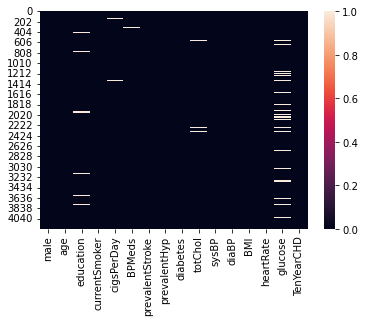

In [12]:
sns.heatmap(df_CHD.isna())

### Handling missing values

##### 1.education

<AxesSubplot:xlabel='education'>

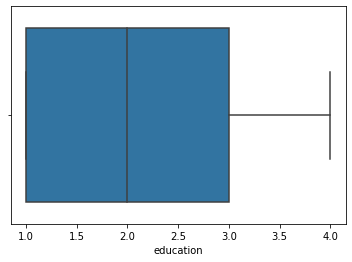

In [13]:
sns.boxplot(df_CHD['education'])

In [14]:
df_CHD['education']=df_CHD['education'].fillna(df_CHD['education'].median())

In [15]:
df_CHD['education'].isna().sum()

0

##### 2.cigsPerDay

<AxesSubplot:xlabel='cigsPerDay'>

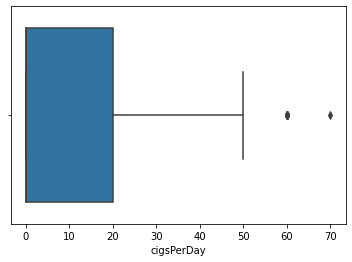

In [16]:
sns.boxplot(df_CHD['cigsPerDay'])

In [17]:
df_CHD['cigsPerDay']=df_CHD['cigsPerDay'].fillna(df_CHD['cigsPerDay'].median())

In [18]:
df_CHD['cigsPerDay'].isna().sum()

0

<AxesSubplot:xlabel='cigsPerDay'>

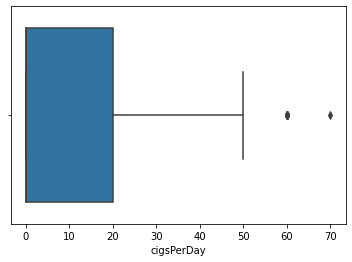

In [19]:
sns.boxplot(df_CHD['cigsPerDay'])

##### 3.BPMeds

In [20]:
df_CHD['BPMeds']=df_CHD['BPMeds'].fillna(df_CHD['BPMeds'].median())

In [21]:
df_CHD['BPMeds'].isna().sum()

0

##### 4.totChol

In [22]:
df_CHD['totChol']=df_CHD['totChol'].fillna(df_CHD['totChol'].median())

In [23]:
df_CHD['totChol'].isna().sum()

0

##### 5.BMI

In [24]:
df_CHD['BMI']=df_CHD['BMI'].fillna(df_CHD['BMI'].median())

In [25]:
df_CHD['totChol'].isna().sum()

0

##### 6.heartRate  

In [26]:
df_CHD['heartRate']=df_CHD['heartRate'].fillna(df_CHD['heartRate'].median())

In [27]:
df_CHD['heartRate'].isna().sum()

0

##### 7.glucose

<AxesSubplot:xlabel='glucose'>

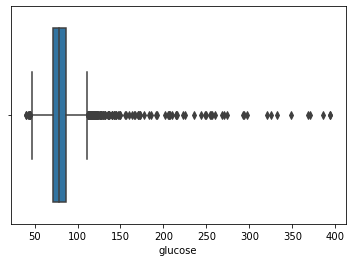

In [28]:
sns.boxplot(df_CHD['glucose'])

In [29]:
df_CHD['glucose']=df_CHD['glucose'].fillna(df_CHD['glucose'].median())

In [30]:
df_CHD['glucose'].isna().sum()

0

<AxesSubplot:xlabel='glucose'>

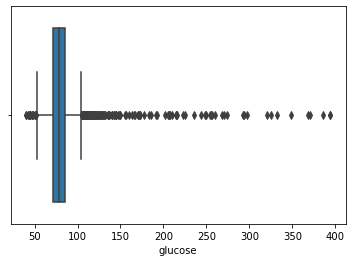

In [31]:
sns.boxplot(df_CHD['glucose'])

In [32]:
df_CHD.isna().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### 3.EDA

#### 1.male

<AxesSubplot:xlabel='male'>

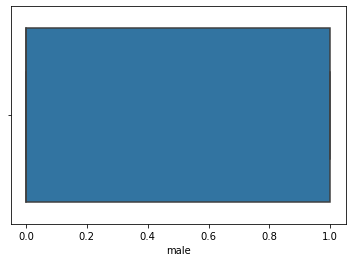

In [33]:
sns.boxplot(df_CHD['male'])

#### 2.age

<AxesSubplot:xlabel='age'>

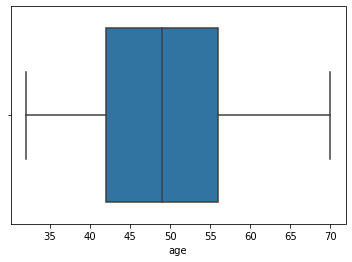

In [34]:
sns.boxplot(df_CHD['age'])

### 3.education

<AxesSubplot:xlabel='education'>

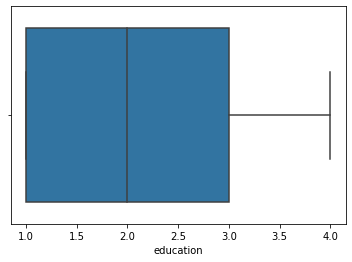

In [35]:
sns.boxplot(df_CHD['education'])

### 4.currentSmoker

<AxesSubplot:xlabel='currentSmoker'>

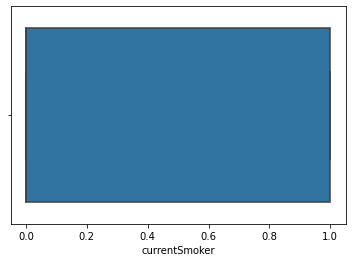

In [36]:
sns.boxplot(df_CHD['currentSmoker'])

### 5.cigsPerDay

<AxesSubplot:xlabel='cigsPerDay'>

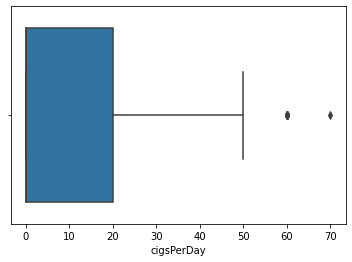

In [37]:
sns.boxplot(df_CHD['cigsPerDay'])

In [38]:
df_CHD['cigsPerDay'] = np.where(df_CHD['cigsPerDay']>59, df_CHD['cigsPerDay'].median(), df_CHD['cigsPerDay'])

### 6.BPMeds

<AxesSubplot:xlabel='BPMeds'>

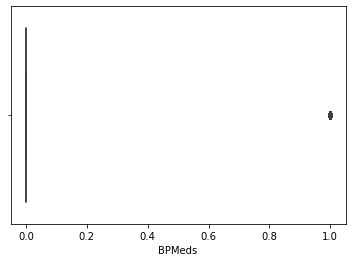

In [39]:
sns.boxplot(df_CHD['BPMeds'])

### 7.prevalentStroke

<AxesSubplot:xlabel='prevalentStroke'>

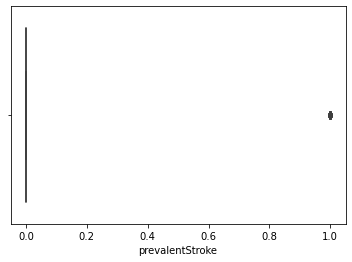

In [40]:
sns.boxplot(df_CHD['prevalentStroke'])

In [41]:
df_CHD['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

### 8.prevalentHyp

In [42]:
df_CHD['prevalentHyp'].value_counts()

0    2922
1    1316
Name: prevalentHyp, dtype: int64

<AxesSubplot:xlabel='prevalentHyp'>

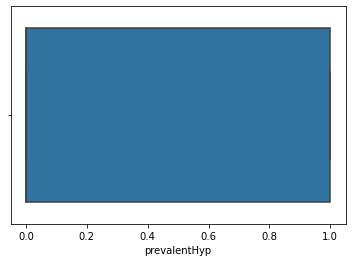

In [43]:
sns.boxplot(df_CHD['prevalentHyp'])

### 9.diabetes

<AxesSubplot:xlabel='diabetes'>

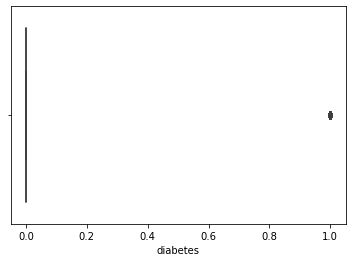

In [44]:
sns.boxplot(df_CHD['diabetes'])

In [45]:
df_CHD['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

### 10.totChol

<AxesSubplot:xlabel='totChol'>

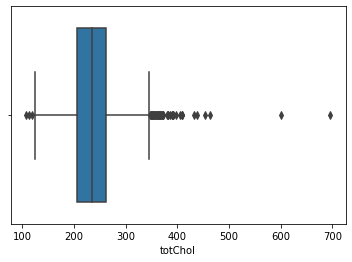

In [46]:
sns.boxplot(df_CHD['totChol'])

In [47]:
df_CHD['totChol'] = np.where(~df_CHD['totChol'].between(110,350), df_CHD['totChol'].median(),
                                   df_CHD['totChol'])

<AxesSubplot:xlabel='totChol'>

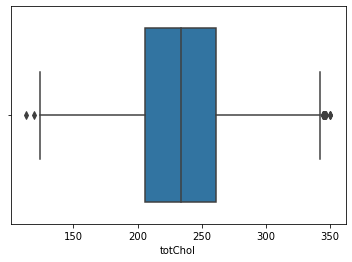

In [48]:
sns.boxplot(df_CHD['totChol'])

### 11.sysBP

<AxesSubplot:xlabel='sysBP', ylabel='Density'>

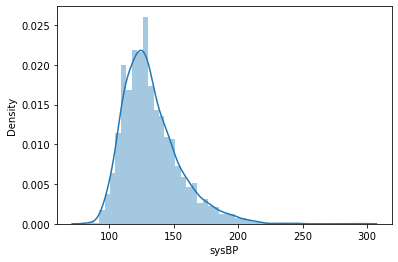

In [49]:
sns.distplot(df_CHD['sysBP'])

<AxesSubplot:xlabel='sysBP'>

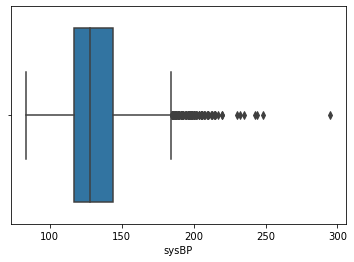

In [50]:
sns.boxplot(df_CHD['sysBP'])

In [51]:
df_CHD['sysBP'] = np.where(df_CHD['sysBP']>185, df_CHD['sysBP'].median(), df_CHD['sysBP'])

<AxesSubplot:xlabel='sysBP'>

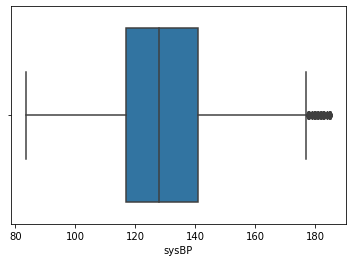

In [52]:
sns.boxplot(df_CHD['sysBP'])

<AxesSubplot:xlabel='sysBP', ylabel='Density'>

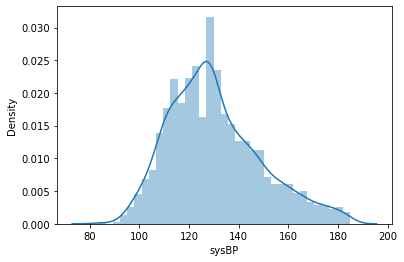

In [53]:
sns.distplot(df_CHD['sysBP'])

### 12.diaBP

<AxesSubplot:xlabel='diaBP', ylabel='Density'>

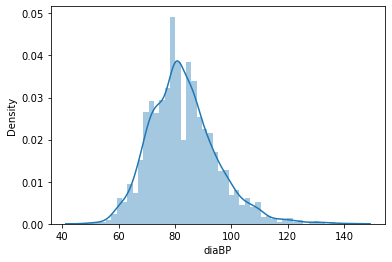

In [54]:
sns.distplot(df_CHD['diaBP'])

<AxesSubplot:xlabel='diaBP'>

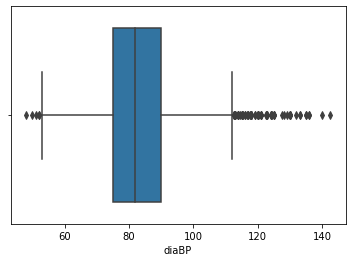

In [55]:
sns.boxplot(df_CHD['diaBP'])

In [56]:
df_CHD['diaBP'] = np.where(~df_CHD['diaBP'].between(46,115), df_CHD['diaBP'].median(),
                                   df_CHD['diaBP'])

<AxesSubplot:xlabel='diaBP'>

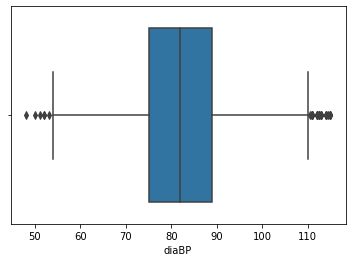

In [57]:
sns.boxplot(df_CHD['diaBP'])

### 13.BMI

<AxesSubplot:xlabel='BMI'>

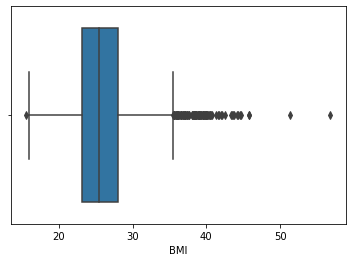

In [58]:
sns.boxplot(df_CHD['BMI'])

In [59]:
df_CHD['BMI'] = np.where(df_CHD['BMI']>37, df_CHD['BMI'].median(), df_CHD['BMI'])

### 14.heartrate

<AxesSubplot:xlabel='heartRate'>

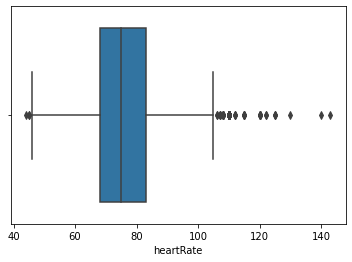

In [60]:
sns.boxplot(df_CHD['heartRate'])

In [61]:
df_CHD['heartRate'] = np.where(df_CHD['heartRate']>105, df_CHD['heartRate'].median(), df_CHD['heartRate'])

### 15.glucose

<AxesSubplot:xlabel='glucose'>

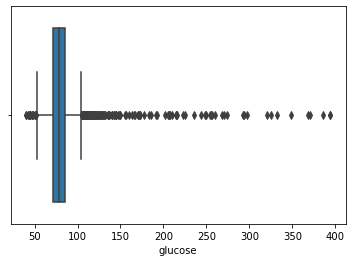

In [62]:
sns.boxplot(df_CHD['glucose'])

In [63]:
df_CHD['glucose'] = np.where(df_CHD['glucose']>105, df_CHD['glucose'].median(), df_CHD['glucose'])

In [64]:
df_CHD['glucose'] = np.where(df_CHD['glucose']<56, df_CHD['glucose'].median(), df_CHD['glucose'])

In [65]:
np.where(df_CHD['glucose'])

(array([   0,    1,    2, ..., 4235, 4236, 4237], dtype=int64),)

<AxesSubplot:xlabel='glucose'>

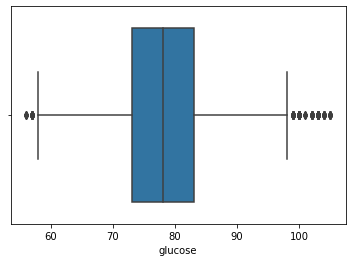

In [66]:
sns.boxplot(df_CHD['glucose'])

### 4.Feature Engineering

### 5.Feature Selection

In [67]:
df_CHD.corr().tail(1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
TenYearCHD,0.088428,0.225256,-0.053383,0.019456,0.059956,0.086417,0.06181,0.177603,0.097317,0.074276,0.1744,0.115033,0.058141,0.015287,0.025682,1.0


<AxesSubplot:>

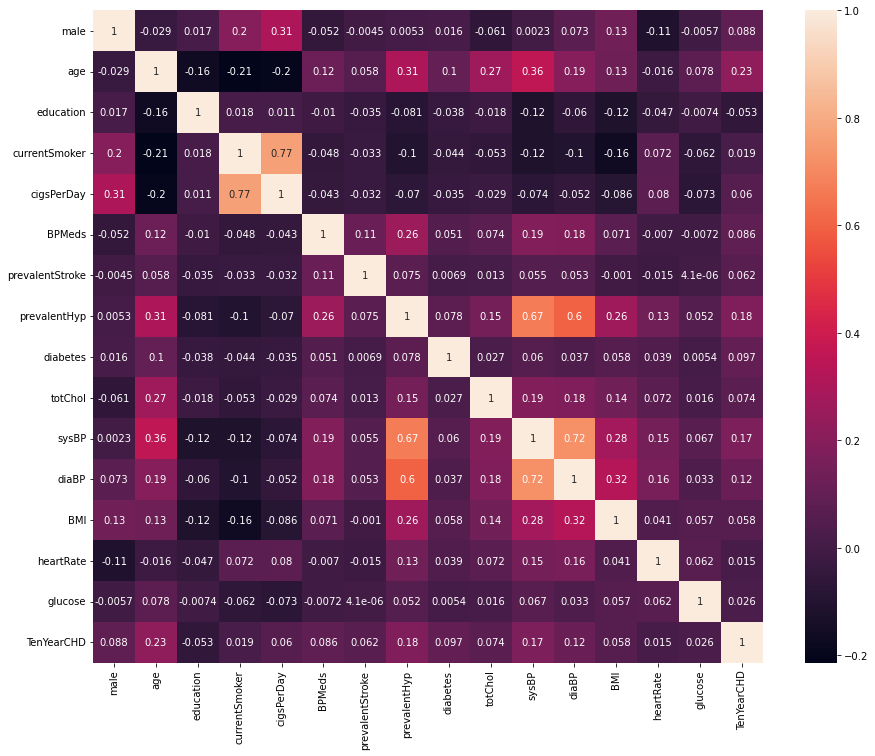

In [68]:
plt.figure(figsize=(15,12))
sns.heatmap(df_CHD.corr(),annot=True)

In [69]:
x = df_CHD.drop('TenYearCHD', axis=1)
x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0


<AxesSubplot:>

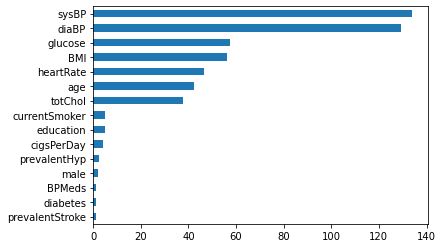

In [70]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind= 'barh')

In [71]:
df_CHD['TenYearCHD'].value_counts(normalize=False)

0    3594
1     644
Name: TenYearCHD, dtype: int64

### 6.Model Training

In [72]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


### synthetic Minority Oversampling Technique (SMOTE)

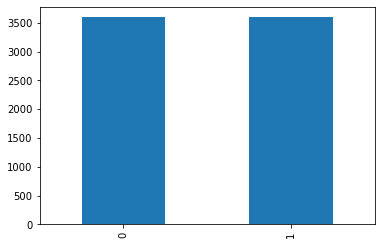

In [76]:
X_clean=x
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X_clean, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_ros,y_ros,test_size=0.3,random_state=0)

In [ ]:
df_CHD['TenYearCHD'].value_counts(normalize=False)

In [75]:
x = df_CHD.drop(['TenYearCHD','education'], axis=1)

y = df_CHD['TenYearCHD']

In [77]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2,stratify=y)

#### Model Instantiating

In [77]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

### Model Evaluation

In [78]:
def evaluate_model(model, ind_var, act):
    pred = model.predict(ind_var)
    
    acc_score = accuracy_score(act,pred)
    print('Accuracy Score:', acc_score)
    print('**'*20)
    
    cnf_matrix = confusion_matrix(act, pred)
    print('Confision Matrix: \n', cnf_matrix)
    print('**'*20)
    
    clf_report = classification_report(act, pred)
    print('Classification Report :\n', clf_report)
    
    return pred
    
print('Testing Data Evaluation'.center(60, '*'))   
y_pred = evaluate_model(log_reg, X_valid, y_valid)
print('Training Data Evaluation'.center(60, '*'))   
y_pred = evaluate_model(log_reg, X_train, y_train)

******************Testing Data Evaluation*******************
Accuracy Score: 0.636532220676866
****************************************
Confision Matrix: 
 [[674 396]
 [388 699]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.63      0.63      0.63      1070
           1       0.64      0.64      0.64      1087

    accuracy                           0.64      2157
   macro avg       0.64      0.64      0.64      2157
weighted avg       0.64      0.64      0.64      2157

******************Training Data Evaluation******************
Accuracy Score: 0.6442059232756907
****************************************
Confision Matrix: 
 [[1607  917]
 [ 873 1634]]
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      2524
           1       0.64      0.65      0.65      2507

    accuracy  

<Figure size 432x288 with 0 Axes>

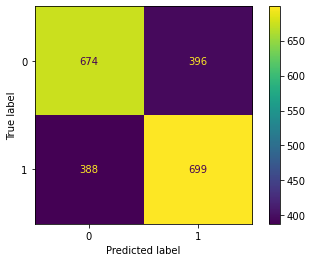

In [79]:
plt.figure(figsize=(6,4))
plot_confusion_matrix(log_reg, X_valid, y_valid)

### AUC ROC curve

In [80]:
y_pred_proba = log_reg.predict_proba(X_valid)
y_pred_proba

array([[0.59098181, 0.40901819],
       [0.59248204, 0.40751796],
       [0.36227384, 0.63772616],
       ...,
       [0.50628941, 0.49371059],
       [0.60204725, 0.39795275],
       [0.2645621 , 0.7354379 ]])

In [81]:
y_pred_proba[:,1]

array([0.40901819, 0.40751796, 0.63772616, ..., 0.49371059, 0.39795275,
       0.7354379 ])

In [82]:
fpr, tpr , thresh = roc_curve(y_valid,y_pred_proba[:,1] )

thresh

array([1.89976079, 0.89976079, 0.89156364, 0.87642473, 0.86753052,
       0.85277718, 0.84697538, 0.8420775 , 0.84165137, 0.84095771,
       0.8393447 , 0.83910426, 0.83169021, 0.83026336, 0.82906067,
       0.82905025, 0.82424464, 0.82268546, 0.80384697, 0.80370274,
       0.80320971, 0.80167797, 0.79863629, 0.79574739, 0.78922738,
       0.78903497, 0.78497591, 0.78439122, 0.78431501, 0.78393465,
       0.78338927, 0.78171643, 0.7814103 , 0.7797049 , 0.7795703 ,
       0.77787137, 0.77363045, 0.77345159, 0.77246941, 0.77185657,
       0.77142785, 0.77058828, 0.76989979, 0.76933827, 0.76882832,
       0.76804333, 0.76581833, 0.7658083 , 0.76567606, 0.76534251,
       0.76380764, 0.76254549, 0.75921492, 0.75851498, 0.75468746,
       0.75438658, 0.75296378, 0.7528523 , 0.75014786, 0.75012164,
       0.74950335, 0.74948187, 0.74571761, 0.7456725 , 0.74220474,
       0.74183282, 0.7415183 , 0.7411966 , 0.7404388 , 0.74029049,
       0.73853014, 0.73850806, 0.73849473, 0.73814468, 0.73643

Text(0, 0.5, 'True Positive Rate')

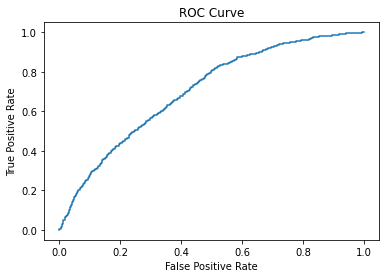

In [83]:
plt.title('ROC Curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [84]:
auc_score = roc_auc_score(y_valid, y_pred_proba[:,1])
auc_score

0.702730657128855

In [85]:
value_pred = []

for i in y_pred_proba[:,1]:
    if i >= 0.5:
        value_pred.append(1)
        
    else:
        value_pred.append(0)

In [86]:
arr = np.array(value_pred)

confusion_matrix(y_valid, arr)

array([[674, 396],
       [388, 699]], dtype=int64)

In [87]:
x.sample(1).T

,3822
male,0.00
age,38.00
currentSmoker,0.00
cigsPerDay,0.00
BPMeds,0.00
prevalentStroke,0.00
prevalentHyp,0.00
diabetes,0.00
totChol,185.00
sysBP,100.00


In [88]:
male=1.00
age=59.00
currentSmoker=1.00
cigsPerDay=43.00
BPMeds=0.00
prevalentStroke=0.00
prevalentHyp=0.00
diabetes=0.00
totChol=207.00
sysBP=132.50
diaBP=66.00
BMI=26.84
heartRate=65.00
glucose=76.00

In [89]:
test_array=np.array([male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,
                     sysBP,diaBP,BMI,heartRate,glucose],ndmin=2)

In [90]:
log_reg.predict(test_array)[0]

1

In [91]:
project_data = {'male': {'yes':0, 'no':1},
               'currentSmoker': {'yes':1,'no':0},
                'BPMeds':{'yes':1,'no':0},
                'prevalentStroke':{'yes':1,'no':0},
                'prevalentHyp':{'yes':1,'no':0},
                'diabetes':{'yes':1,'no':0},
                'columns': list(x.columns)}
project_data

{'male': {'yes': 0, 'no': 1},
 'currentSmoker': {'yes': 1, 'no': 0},
 'BPMeds': {'yes': 1, 'no': 0},
 'prevalentStroke': {'yes': 1, 'no': 0},
 'prevalentHyp': {'yes': 1, 'no': 0},
 'diabetes': {'yes': 1, 'no': 0},
 'columns': ['male',
  'age',
  'currentSmoker',
  'cigsPerDay',
  'BPMeds',
  'prevalentStroke',
  'prevalentHyp',
  'diabetes',
  'totChol',
  'sysBP',
  'diaBP',
  'BMI',
  'heartRate',
  'glucose']}

In [92]:
test_array = np.zeros(x.shape[1])
test_array[0] = project_data['male']['yes']
test_array[1] = age
test_array[2] = project_data['currentSmoker']['yes']
test_array[3] = cigsPerDay
test_array[4] = project_data['BPMeds']['no']
test_array[5] = project_data['prevalentStroke']['no']
test_array[6] = project_data['prevalentHyp']['no']
test_array[7] = project_data['diabetes']['no']
test_array[8] = totChol
test_array[9] = sysBP
test_array[10] = diaBP
test_array[11] = BMI
test_array[12] = heartRate
test_array[13] = glucose

test_array

array([  0.  ,  59.  ,   1.  ,  43.  ,   0.  ,   0.  ,   0.  ,   0.  ,
       207.  , 132.5 ,  66.  ,  26.84,  65.  ,  76.  ])

In [93]:
result = log_reg.predict([test_array])
print(f'risk of chronic heart disease in 10 years : .', result)

risk of chronic heart disease in 10 years : . [1]


In [94]:
import pickle

In [95]:
with open('Log_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [2]:
import json

In [96]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)